In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_promo = {
    "Experience_Years":[2,4,5,3,6,5],
    "Performance_Rating":[3,4,5,3,4,4],
    "Promoted":["No","Yes","Yes","No","Yes",None]
}
df=pd.DataFrame(data_promo)
print("Dataset: ")
display(df)

Dataset: 


,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes
5,5,4,None


In [13]:
#clean th data df_promo.dropna()
train_df =df.dropna()

In [14]:
train_df

,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes


In [19]:
# Split data find input and output
X = train_df[['Experience_Years','Performance_Rating']]
y = train_df['Promoted']

In [20]:
# create the model
model= DecisionTreeClassifier()

In [21]:
# train the model
model.fit(X,y)

DecisionTreeClassifier()

In [23]:
# predict
pred = model.predict([[5,4]])
print('Promotion Prediction:', pred[0])

Promotion Prediction: Yes


C:\Users\mirah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


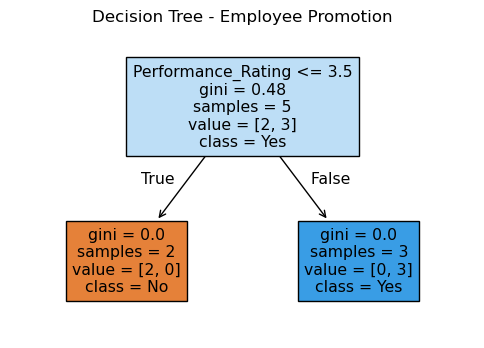

In [24]:
plt.figure(figsize=(6,4))
plot_tree(model,
          feature_names=['Experience_Years','Performance_Rating'],
          class_names=['No','Yes'],
          filled=True)
plt.title('Decision Tree - Employee Promotion')
plt.show()

# Task 1: Predict input from user
    # take the experience years and performance rating from user and display Promoted or not promoted using prediction
    # write code in this way, there should be no warning message
    # exp_years=
    # per_rating=
    # print('Promoted?,)

In [28]:
exp_years=float(input('Enter Experince Years: '))
per_rating=float(input('Enter Performance Rating: '))
our_promo=pd.DataFrame([[exp_years,per_rating]], columns = ['Experience_Years', 'Performance_Rating'])
pred_promo= model.predict(our_promo)
print(f'Experince Years is: {exp_years}, Performance Rating is: {per_rating}, The Promoted Prediction is: {pred_promo[0]}')

Enter Experince Years:  6
Enter Performance Rating:  4


Experince Years is: 6.0, Performance Rating is: 4.0, The Promoted Prediction is: Yes


# One more example on Decision Tree Classifier

In [115]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 

# one hot encorder for income (categories convert to 0.0, 0.1)
# label encoder for Buy (2 only option like Yes/No convert to 0 and 1)

In [116]:
data = {
    'Age': [25,30,45,35,22,40,50],
    'Income': ['Low','Medium','High','Medium','Low','High','High'],
    'Buy': ['No','No','Yes','Yes','No','Yes','Yes']
}

In [117]:
df=pd.DataFrame(data)
print("Dataset: ")
display(df)

Dataset: 


,Age,Income,Buy
0,25,Low,No
1,30,Medium,No
2,45,High,Yes
3,35,Medium,Yes
4,22,Low,No
5,40,High,Yes
6,50,High,Yes


In [118]:
# One Hot Encoder
encoder = OneHotEncoder(sparse_output=False)
income_encoded= encoder.fit_transform(df[['Income']])
income_encoded_df = pd.DataFrame(income_encoded, columns= encoder.get_feature_names_out(['Income']))
income_encoded_df

,Income_High,Income_Low,Income_Medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0


In [119]:
# Label Encoder
label_encoder = LabelEncoder()
df['Buy'] =label_encoder.fit_transform(df['Buy'])
df['Buy']

0    0
1    0
2    1
3    1
4    0
5    1
6    1
Name: Buy, dtype: int64

In [120]:
df_encoded = pd.concat([df[['Age','Buy']], income_encoded_df], axis=1)
df_encoded

,Age,Buy,Income_High,Income_Low,Income_Medium
0,25,0,0.0,1.0,0.0
1,30,0,0.0,0.0,1.0
2,45,1,1.0,0.0,0.0
3,35,1,0.0,0.0,1.0
4,22,0,0.0,1.0,0.0
5,40,1,1.0,0.0,0.0
6,50,1,1.0,0.0,0.0


In [132]:
# Split data
X = df_encoded.drop('Buy', axis=1)
y = df_encoded['Buy']
X,y

(   Age  Income_High  Income_Low  Income_Medium
 0   25          0.0         1.0            0.0
 1   30          0.0         0.0            1.0
 2   45          1.0         0.0            0.0
 3   35          0.0         0.0            1.0
 4   22          0.0         1.0            0.0
 5   40          1.0         0.0            0.0
 6   50          1.0         0.0            0.0,
 0    0
 1    0
 2    1
 3    1
 4    0
 5    1
 6    1
 Name: Buy, dtype: int64)

In [133]:
model= DecisionTreeClassifier()

In [134]:
model.fit(X,y)

DecisionTreeClassifier()

In [125]:
sample = pd.DataFrame({'Age': [25], 'Income': ['Low']})
sample_encoded = encoder.transform(sample[['Income']])

sample_encoded_df = pd.DataFrame(sample_encoded, columns=encoder.get_feature_names_out(['Income']))

sample_final = pd.concat([sample[["Age"]], sample_encoded_df], axis=1)

prediction = model.predict(sample_final)
predicted_label = label_encoder.inverse_transform(prediction)

print('Prediction for Age=28, Income=Low ->', predicted_label[0])

Prediction for Age=28, Income=Low -> No


In [137]:
person_age=int(input('Enter Age'))
person_income=input('Enter category Low,Medium or High :\t')
person=pd.DataFrame({'Age':[person_age],'Income':[person_income]})
person_encoded = encoder.transform(person[['Income']])
person_encoded_df = pd.DataFrame(person_encoded, columns=encoder.get_feature_names_out(['Income']))
person_final = pd.concat([person['Age'], person_encoded_df], axis=1)
prediction = model.predict(person_final)
predicted_label = label_encoder.inverse_transform(prediction)
print(f'Prediction for Age={person_age}, Income={person_income} → { predicted_label[0]}')

Enter Age 25
Enter category Low,Medium or High :	 low


ValueError: Found unknown categories ['low'] in column 0 during transform

In [ ]:
person_age= int(input('Enter Age'))
person_income= input('Enter category Low,Medium or High :\t')
person=pd.DataFrame({'Age':[person_age],'Income':[person_income]})
person_encoded = encoder.transform(person[['Income']])

person_encoded_df = pd.DataFrame(person_encoded, columns=encoder.get_feature_names_out(['Income']))
person_final = pd.concat([person['Age'], person_encoded_df], axis=1)

prediction = model.predict(person_final)
predicted_label = label_encoder.inverse_transform(prediction)
print(f'Prediction for Age={person_age}, Income={person_income} → { predicted_label[0]}')

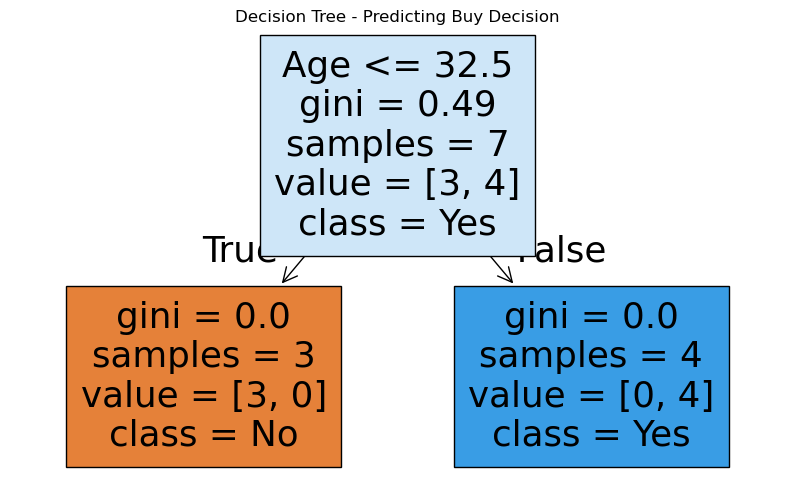

In [138]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.title('Decision Tree - Predicting Buy Decision')
plt.show()